In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Evaluating a Machine Learning Model

Three ways to evaluate Scikit-Learn Models
1. Estimator `score` method
2. the `scoring` parameter
3. Problem-Specific metric functions.



In [3]:
heart_disease = pd.read_csv('C:/Users/pravi/Documents/GitHub/Python-Basics/05. Libraries/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 5.1 Evaluating using `score` Method

In [27]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
clf.score(x_train, y_train)

1.0

In [28]:
clf.score(x_test, y_test)

0.8524590163934426

Lets do the same for regression

In [33]:
# Import Boston Housing Dataset
from sklearn.datasets import load_boston

boston = load_boston()
boston

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston['target'])
boston_df.head()

# Lets Try Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the Data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the Data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# Instantiate RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
# Evaluate the Random Forest Regressor
rf.score(x_test, y_test)

0.873969014117403

### 5.2 Evaluating a model using the `scoring` parameter

In [39]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train);



In [40]:
clf.score(x_test, y_test)

0.8524590163934426

In [42]:
cross_val_score(clf, x,y, cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [43]:
cross_val_score(clf, x,y, cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [44]:
np.random.seed(42)

# Single training and testing Split score
clf_single_score = clf.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score =np.mean(cross_val_score(clf, x,y, cv=5))

# Compare the Two
clf_single_score, clf_cross_val_score


(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

In [45]:
# Scoring parameter set to None by default
cross_val_score(clf, x, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 5.2.1 Classification model Evaluation Metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

### Accuracy

In [53]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_vall_score=cross_val_score(clf, x, y, cv=5)

In [50]:
np.mean(cross_vall_score)

0.8248087431693989

In [52]:
print(f"Heart Disease CLassifier Cross-Validation Accuracy: {np.mean(cross_vall_score)*100:.2f}%")

Heart Disease CLassifier Cross-Validation Accuracy: 82.48%


### 5.2.2 Area Under the reciever Operating Characteristics Curve (AUC/RUC)

* Area Under Curve (AUC)
* ROC

ROC curves are a comparison of a models True Positive Rate(TPR) versus a False Positive Rate(FPR)

* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* flase Negative = model predicts  when truth is 1

In [56]:
# create x_test... etc
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [59]:
from sklearn.metrics import roc_curve

# Fit the Classifier
clf.fit(x_train, y_train)

# Make predictons with probabilites
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.67, 0.33],
        [0.59, 0.41],
        [0.88, 0.12],
        [0.11, 0.89],
        [0.06, 0.94],
        [0.07, 0.93],
        [0.23, 0.77],
        [0.9 , 0.1 ],
        [0.36, 0.64],
        [0.12, 0.88]]),
 61)

In [60]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.33, 0.41, 0.12, 0.89, 0.94, 0.93, 0.77, 0.1 , 0.64, 0.88])

In [62]:
# Calculate FPR, TPR and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the False Positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03703704, 0.03703704, 0.07407407,
       0.07407407, 0.11111111, 0.11111111, 0.22222222, 0.22222222,
       0.22222222, 0.25925926, 0.25925926, 0.33333333, 0.40740741,
       0.44444444, 0.51851852, 0.51851852, 0.74074074, 0.81481481,
       0.81481481, 0.88888889, 1.        ])

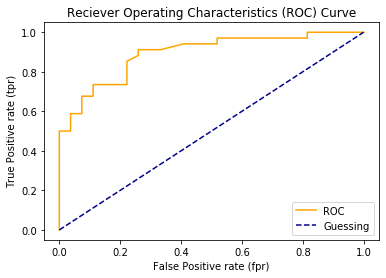

In [64]:
# Create a function for plotting ROC curve

import matplotlib.pyplot as plt

def plot_roc(fpr, tpr):
    """
    Plots a ROC curve given a False Positive(fpr) and
    True Positive rate(tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot the line with no Predictive Power(baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("Reciever Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc(fpr,tpr)

In [65]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8927015250544662

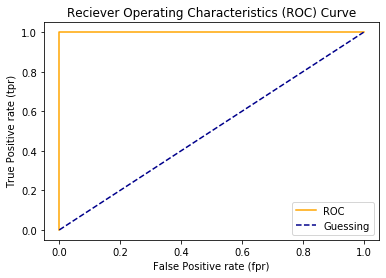

In [67]:
# Plot perfect ROC curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc(fpr,tpr)

In [68]:
# Perfect AUC Score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [70]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[21,  6],
       [ 7, 27]], dtype=int64)

In [72]:
# visualize Confusion Matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,21,6
1,7,27


In [73]:
21+6+7+27

61

In [74]:
len(x_test)

61

In [ ]:
# Make our Confusion Matrix more visual with Seaborn's Heatmap

import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# Create a Confusion Matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);